In [3]:
#Loading up all libraries
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

In [4]:
# dimensions of our images.  
img_width, img_height = 224, 224  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation'  
   
# number of epochs to train top model  
epochs = 100  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

## Start from here

In [5]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 13412 images belonging to 6 classes.
Time:  0:00:01.223079


In [6]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


First Model Softmax One Hidden Layer

In [12]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=5,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/5
13412/13412 [==============================] - 13s 985us/step - loss: 2.0382 - acc: 0.6707 - val_loss: 0.4915 - val_acc: 0.8321
Epoch 2/5
13412/13412 [==============================] - 13s 952us/step - loss: 0.5033 - acc: 0.8339 - val_loss: 0.5426 - val_acc: 0.8407
Epoch 3/5
13412/13412 [==============================] - 13s 962us/step - loss: 0.3993 - acc: 0.8688 - val_loss: 0.3190 - val_acc: 0.8976
Epoch 4/5
13412/13412 [==============================] - 14s 1ms/step - loss: 0.3539 - acc: 0.8885 - val_loss: 0.3450 - val_acc: 0.8882
Epoch 5/5
2549/2549 [==============================] - 1s 210us/step
[INFO] accuracy: 88.78%
[INFO] Loss: 0.3854629319510468
Time:  0:01:07.064059


Second Model softmax two hidden layer

In [56]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/20
13412/13412 [==============================] - 7s 519us/step - loss: 1.0911 - acc: 0.5924 - val_loss: 0.5912 - val_acc: 0.7768
Epoch 2/20
13412/13412 [==============================] - 6s 427us/step - loss: 0.6944 - acc: 0.7293 - val_loss: 0.4831 - val_acc: 0.8266
Epoch 3/20
13412/13412 [==============================] - 6s 424us/step - loss: 0.5868 - acc: 0.7751 - val_loss: 0.5778 - val_acc: 0.7850
Epoch 4/20
13412/13412 [==============================] - 5s 406us/step - loss: 0.5318 - acc: 0.8008 - val_loss: 0.3564 - val_acc: 0.8972
Epoch 5/20
13412/13412 [==============================] - 5s 384us/step - loss: 0.4893 - acc: 0.8203 - val_loss: 0.4711 - val_acc: 0.8282
Epoch 6/20
13412/13412 [==============================] - 5s 392us/step - loss: 0.4421 - acc: 0.8366 - val_loss: 0.3844 - val_acc: 0.8647
Epoch 7/20
13412/13412 [==============================] - 5s 385us/step - loss: 0.4197 - acc: 0.8426 - val_loss: 0.3104 - v

Third Model Softmax with multiple hidden and dropout later

In [54]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(200, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/20
13412/13412 [==============================] - 12s 914us/step - loss: 1.3061 - acc: 0.5381 - val_loss: 0.6616 - val_acc: 0.7603
Epoch 2/20
13412/13412 [==============================] - 11s 784us/step - loss: 0.8044 - acc: 0.7053 - val_loss: 0.6882 - val_acc: 0.7717
Epoch 3/20
13412/13412 [==============================] - 10s 769us/step - loss: 0.6879 - acc: 0.7505 - val_loss: 0.4405 - val_acc: 0.8427
Epoch 4/20
13412/13412 [==============================] - 10s 776us/step - loss: 0.6346 - acc: 0.7707 - val_loss: 0.3599 - val_acc: 0.9000
Epoch 5/20
13412/13412 [==============================] - 10s 778us/step - loss: 0.5947 - acc: 0.7835 - val_loss: 0.3445 - val_acc: 0.8984
Epoch 6/20
13412/13412 [==============================] - 10s 777us/step - loss: 0.5653 - acc: 0.7909 - val_loss: 0.3544 - val_acc: 0.8980
Epoch 7/20
13412/13412 [==============================] - 10s 779us/step - loss: 0.5400 - acc: 0.8058 - val_loss: 0.3

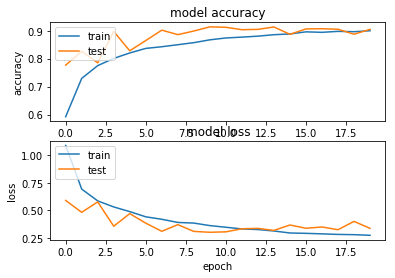

In [57]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [63]:
image_path = 'data/test/elephants/OIP-wxKaLAcA94Sf5lyZ65A08gHaFs.jpeg'  

orig = mpimg.imread(image_path)  

print("[INFO] Image Loaded")  
image = load_img(image_path, target_size=(224, 224))  
image = img_to_array(image)  

# important! otherwise the predictions will be '0'  
image = image / 255  

image = np.expand_dims(image, axis=0)  
# print(image)

[INFO] Image Loaded


In [64]:
# build the VGG16 network  
model = applications.VGG16(include_top=False, weights='imagenet')  

# get the bottleneck prediction from the pre-trained VGG16 model  
bottleneck_prediction = model.predict(image)  

# build top model  
model = Sequential()  
model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.load_weights(top_model_weights_path)  

# use the bottleneck prediction on the top model to get the final classification  
class_predicted = model.predict_classes(bottleneck_prediction)

In [65]:
inID = class_predicted[0]  

class_dictionary = generator_top.class_indices  

inv_map = {v: k for k, v in class_dictionary.items()}  

label = inv_map[inID]  

# get the prediction label  
print("Image ID: {}, Label: {}".format(inID, label))  

# # display the predictions with the image  
# cv2.putText(orig, "Predicted: {}".format(label), (10, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)  

# cv2.imshow("Classification", orig)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows()  

Image ID: 2, Label: elephants


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


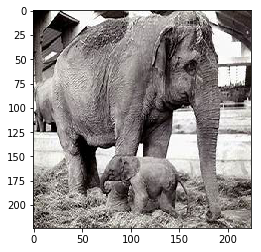

In [66]:
from keras.preprocessing import image

# img = np.random.rand(224,224,3)
# plt.imshow(img)
# plt.show()

img_path = image_path
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)

In [34]:
class_dictionary

{'butterflies': 0,
 'chickens': 1,
 'elephants': 2,
 'horses': 3,
 'spiders': 4,
 'squirels': 5}